<a href="https://colab.research.google.com/github/youssefHosni/Machine-Learning-Practical-Guide/blob/main/Building_Complex_Deep_Learning_Models_Using_Keras_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building Complex Deep Learning Models Using Keras Functional API

The Functional API in Keras is a powerful extension to the Sequential model. It allows us to create complex models by composing simple building blocks that each takes one or more inputs, process them and return one output. This article will give you an overview of the Keras Functional API architecture as well as concrete examples of how to implement it for your own use cases.

# Table of Contents:

1. Loading the Data & Building a Simple Model
2. Building a Wide & Deep Neural Network
3. Building Wide & Deep Neural Network With Multiple Inputs
4. Building Wide & Deep Neural Network With Multiple Inputs & Outputs


# 1. Loading the Data & Building a Simple Model
First, we will load the data we will use through this article which will be the [MNSIT Fashion](https://www.tensorflow.org/datasets/catalog/fashion_mnist) dataset. The data consists of different types of fashion and contains ten classes.

Let's first load the required libraries:

In [1]:
from tensorflow import keras
from tensorflow.keras.utils import plot_model
import pandas as pd
import matplotlib.pyplot as plt

Next, let's load the dataset from the **Keras.datasets** library and then split the data into training and validation and finally normalize the data:

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

4422102/4422102 [==============================] - 0s 0us/step


Now let's print the size of the datasets and the labels:

In [3]:
print('The size of the trainig data is {} and the size of the train labels is {}' .format(X_train.shape , y_train.shape))
print('The size of the validation data is {} and the size of the validation labels is {}' .format(X_valid.shape , y_valid.shape))
print('The size of the test data is {} and the size of the test labels is {}' .format(X_test.shape , y_test.shape))

The size of the trainig data is (55000, 28, 28) and the size of the train labels is (55000,)
The size of the validation data is (5000, 28, 28) and the size of the validation labels is (5000,)
The size of the test data is (10000, 28, 28) and the size of the test labels is (10000,)


As we can see the size of the training data is 55000 and 5000 for validation data and test data is 10000. The size of each image is 28*28. 


In [4]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Let's plot a subset of the data to have a better idea of what we working with. The data is shown in figure 1.

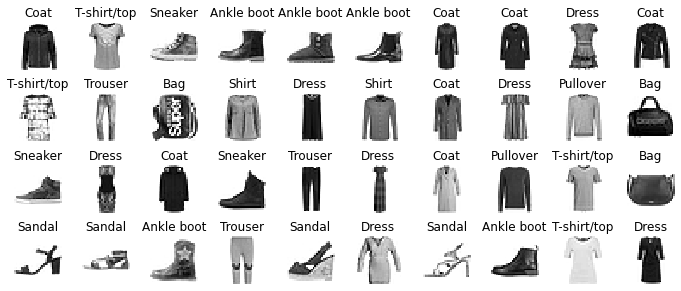

In [33]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Now for simplicity reasons, we will flatten the data to be easily used within the neural networks:

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_valid = X_valid.reshape(X_valid.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

In [6]:
X_train.shape

(55000, 784)

Let's build and train a simple MLP neural network as shown in the figure below:

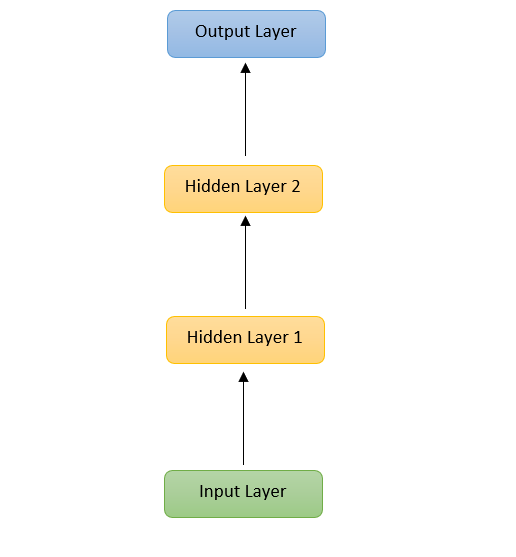

Let's now build the model shown in figure2. The code is self-explanatory we first define the input layer with the expected input size. Next, we define the first hidden layer with 30 neurons and the Relu activation function and then the second hidden layer with the same parameters.
 
Finally, the output layer with the number of classes we have which in our case is 10. Finally, we will plot the model using the plot_model function from the Keras utils library.

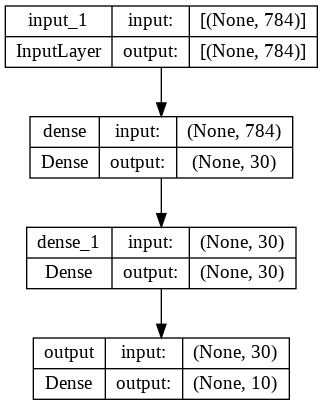

In [11]:
input_ = keras.layers.Input(shape=[28*28])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
output = output = keras.layers.Dense(10, activation="softmax", name="output")(hidden2)
model = keras.models.Model(inputs=[input_], outputs=[output])

keras.utils.plot_model(model, "Neural_Network.png", show_shapes=True)

Now let's compile the model and fit it to the training data and plot the learning curve using the code below:

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.9042 - accuracy: 0.6882 - val_loss: 0.5814 - val_accuracy: 0.8034
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5402 - accuracy: 0.8147 - val_loss: 0.4917 - val_accuracy: 0.8348
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4828 - accuracy: 0.8323 - val_loss: 0.4449 - val_accuracy: 0.8504
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4544 - accuracy: 0.8397 - val_loss: 0.4370 - val_accuracy: 0.8520
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4348 - accuracy: 0.8470 - val_loss: 0.4433 - val_accuracy: 0.8394
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4196 - accuracy: 0.8526 - val_loss: 0.4033 - val_accuracy: 0.8664
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4079 - accuracy: 0.8562 - val_loss: 0.4014 - val_accuracy:

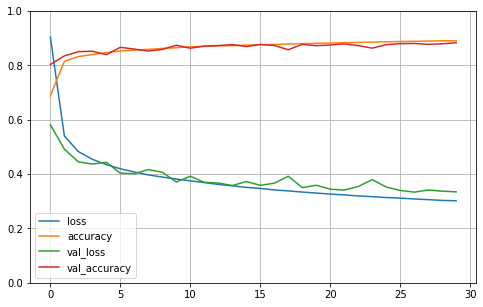

In [12]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

The final step is to evaluate the model on the test data and print the accuracy and the loss. The accuracy of the model is 86.7% which is good compared to the simplicity of the model.

In [13]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3656 - accuracy: 0.8674


[0.3655974566936493, 0.8673999905586243]

# 2. Building a Wide & Deep Neural Network

The first example of complex models is the wide & Deep network which is a nonsequential neural network that was first introduced in the [Wide & Deep Learning for Recommender Systems paper](https://arxiv.org/abs/1606.07792) by Heng-Tze Cheng et al. 

In this model part of the inputs or all of it is connected directly to the output layer as shown in figure 5. This architecture allows the model to learn both deep information using the deep path and simple information directly from the input through the wide path.

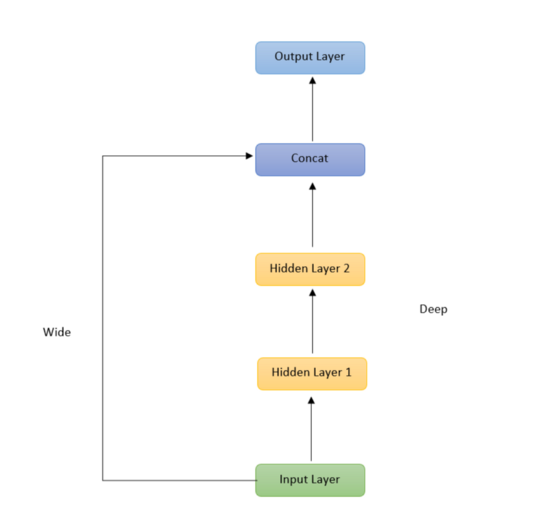

Here is the code to build this architecture using Keras API and to make sure that the model built is the same as the required one we will plot the model architecture using the **Keras.utils.plot_model** method. The resulting model is shown in figure 6.

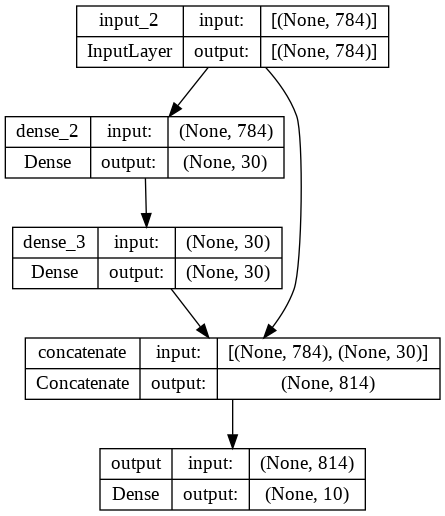

In [14]:
input_ = keras.layers.Input(shape=[28*28])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = output = keras.layers.Dense(10, activation="softmax", name="output")(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

keras.utils.plot_model(model, "Deep & wide.png", show_shapes=True)


Let's explain the code in more detail:

* **input_**: In the first line we created an Input object. This defines the input of the model which includes its type and shape. The model can have multiple objects as we will see in the coming models. 
* **hidden1:** The next step is to create the first hidden layer with 30 neurons and the ReLU activation function and we pass to it the input we created in the line before. You can see that it is similar to calling a function that's why it is called Functional API.
* **hidden2:** Next we created another hidden layer with the same properties as the previously hidden layer and we pass to it the output of the previously hidden layer. 
* **concat:** This is a Concatenate layer, and is used to concatenate the input and the output of the second hidden layer. 
output: This is the output layer which consists of one single neuron and no activation function for the sake of simplicity but you can add what you need for your model. 
* **model:** Finally we create the Keras model and specify which input and outputs to use.

The next step is to compile the model and fit it to the training data and plot the learning curve. This can be done using the code below:

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.8344 - accuracy: 0.7308 - val_loss: 0.6276 - val_accuracy: 0.8010
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5869 - accuracy: 0.8081 - val_loss: 0.5452 - val_accuracy: 0.8252
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5299 - accuracy: 0.8236 - val_loss: 0.5007 - val_accuracy: 0.8376
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4974 - accuracy: 0.8329 - val_loss: 0.4751 - val_accuracy: 0.8446
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4764 - accuracy: 0.8376 - val_loss: 0.4617 - val_accuracy: 0.8430
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4607 - accuracy: 0.8415 - val_loss: 0.4554 - val_accuracy: 0.8462
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4479 - accuracy: 0.8451 - val_loss: 0.4412 - val_accuracy:

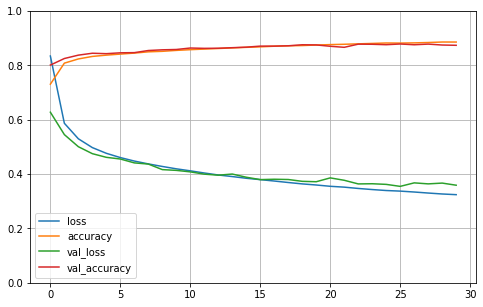

In [15]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

The final step is to evaluate the model on the test data and print the accuracy and the loss. The accuracy of the model is 85.9% which is good compared to the simplicity of the model although it is smaller than the simple MLP model introduced in the previous section.

In [16]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3919 - accuracy: 0.8595


[0.3919452726840973, 0.859499990940094]

# 3. Building Wide & Deep Neural Network With Multiple Inputs

Another important variation you can to the previous model is to have two paths for the input, this will be very useful if you would like for example to send part of the input features through the wide path and part through the deep path. This model is shown in figure 8.

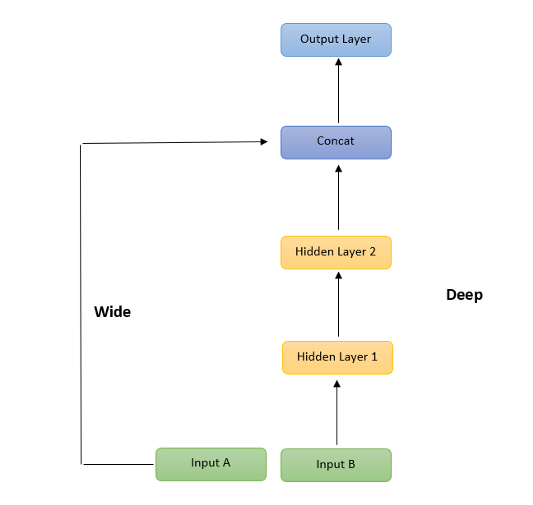

So let's build this and we will split half of the features to go through the deep path and the other half to go through the wide path and then we will plot the created model as shown in figure 9.

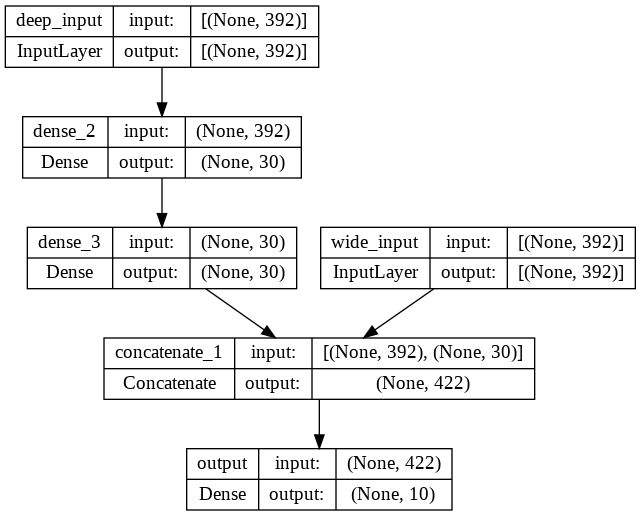

In [9]:
input_A = keras.layers.Input(shape=[392], name="wide_input")
input_B = keras.layers.Input(shape=[392], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(10, activation="softmax", name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

keras.utils.plot_model(model, "multiple_inputs_model.png", show_shapes=True)


The code is very similar to the previous one except that we have to define two inputs (input_A and input_B) when creating the model each with the input shape of 392 which is half the number of features we have. 

Next, let's compile and fit the model to the data using the code below:

In [10]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

X_train_A, X_train_B = X_train[:, :392], X_train[:, 392:]
X_valid_A, X_valid_B = X_valid[:, :392], X_valid[:, 392:]
X_test_A, X_test_B = X_test[:, :392], X_test[:, 392:]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
1719/1719 [==============================] - 7s 3ms/step - loss: 0.9552 - accuracy: 0.7015 - val_loss: 0.7040 - val_accuracy: 0.7656
Epoch 2/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6274 - accuracy: 0.7931 - val_loss: 0.5759 - val_accuracy: 0.8108
Epoch 3/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5524 - accuracy: 0.8132 - val_loss: 0.5202 - val_accuracy: 0.8298
Epoch 4/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5130 - accuracy: 0.8245 - val_loss: 0.4958 - val_accuracy: 0.8328
Epoch 5/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4893 - accuracy: 0.8302 - val_loss: 0.4727 - val_accuracy: 0.8450
Epoch 6/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4722 - accuracy: 0.8361 - val_loss: 0.4583 - val_accuracy: 0.8510
Epoch 7/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4586 - accuracy: 0.8411 - val_loss: 0.4591 - val_accuracy:

As you can see the compile and fit methods are similar to the previous code the only difference is in the fit method in which we have to give two inputs for training data, validation, and test data. Finally, we will evaluate this model using the test data using the code below:

In [11]:
test = model.evaluate((X_test_A, X_test_B), y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4151 - accuracy: 0.8543


# 4. Building Wide & Deep Neural Network With Multiple Inputs & Outputs

Finally, we will build a Wide and deep neural network with both multiple inputs and multiple outputs as shown in figure 10. This can be used in multiple cases such as:
* You have multiple outputs such as in object detection and classification you 
would like to return the coordinates of the object and its class. 
* You might be working on multiple tasks and everyone will have different output layers. For example, you might be working on facial detection tasks and emotion recognition and identify identification. So you can train the same network and have separate output layers for each of them. 
* Another possible use is for regularization purposes which we will be using multiple outputs for in this example. Regularization methods are used to reduce overfitting and improve models' ability to generalize to new data. 

In the example below we will use an auxiliary output in a neural network to ensure that the underlying part of the network will learn useful information on its own without relying on the rest of the network.

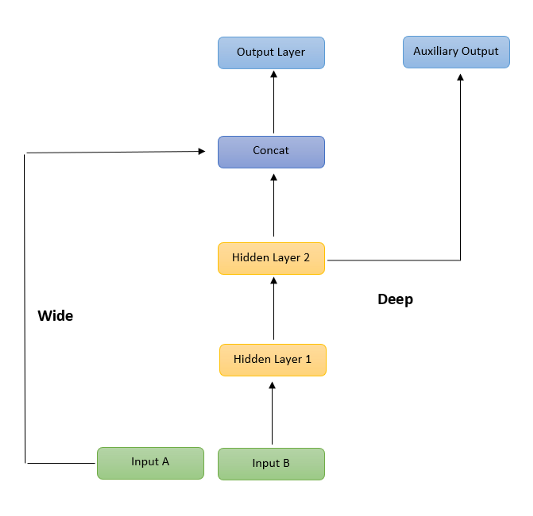

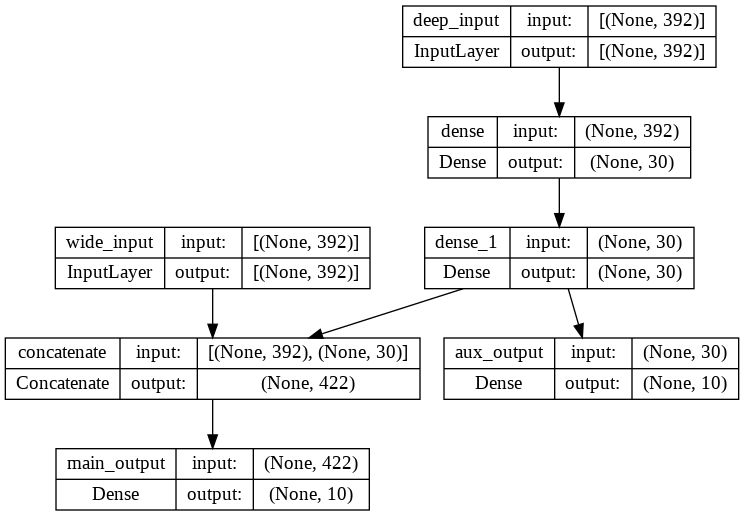

In [7]:
input_A = keras.layers.Input(shape=[392], name="wide_input")
input_B = keras.layers.Input(shape=[392], name="deep_input")

hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)

concat = keras.layers.concatenate([input_A, hidden2])

output = keras.layers.Dense(10, activation="softmax",name="main_output")(concat)
aux_output = keras.layers.Dense(10, activation="softmax", name="aux_output")(hidden2)

model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

keras.utils.plot_model(model, "model.png", show_shapes=True)


Now let's compile and fit the model to the training data. Since we are using two outputs therefore we will have to define two loss functions (if we pass one loss function then it will assume that it will be used for both outputs) also the weight of each loss should be declared else it will assume both outputs will contribute to the model loss with the same amount. In this case, we would like to give more weight to the main output than the auxiliary output. So the weight of the losses will be 0.7 to the main output and 0.3 to the auxiliary output.

In [8]:
model.compile(loss=["sparse_categorical_crossentropy","sparse_categorical_crossentropy" ],
              optimizer="sgd",
              loss_weights=[0.7, 0.3],
              metrics=["accuracy"])

Let's now fit the model on the training data:

In [9]:
X_train_A, X_train_B = X_train[:, :392], X_train[:, 392:]
X_valid_A, X_valid_B = X_valid[:, :392], X_valid[:, 392:]
X_test_A, X_test_B = X_test[:, :392], X_test[:, 392:]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
1719/1719 [==============================] - 13s 6ms/step - loss: 1.1672 - main_output_loss: 1.0265 - aux_output_loss: 1.4954 - main_output_accuracy: 0.6779 - aux_output_accuracy: 0.5028 - val_loss: 0.8206 - val_main_output_loss: 0.7142 - val_aux_output_loss: 1.0687 - val_main_output_accuracy: 0.7702 - val_aux_output_accuracy: 0.6474
Epoch 2/20
1719/1719 [==============================] - 7s 4ms/step - loss: 0.7457 - main_output_loss: 0.6476 - aux_output_loss: 0.9748 - main_output_accuracy: 0.7847 - aux_output_accuracy: 0.6561 - val_loss: 0.6693 - val_main_output_loss: 0.5821 - val_aux_output_loss: 0.8728 - val_main_output_accuracy: 0.8082 - val_aux_output_accuracy: 0.6830
Epoch 3/20
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6537 - main_output_loss: 0.5644 - aux_output_loss: 0.8620 - main_output_accuracy: 0.8078 - aux_output_accuracy: 0.6865 - val_loss: 0.6146 - val_main_output_loss: 0.5326 - val_aux_output_loss: 0.8057 - val_main_output_accuracy: 0.

Finally, let's evaluate the model on the test data:

In [12]:
model.evaluate([X_test_A, X_test_B], [y_test, y_test])

313/313 [==============================] - 1s 3ms/step - loss: 0.4938 - main_output_loss: 0.4289 - aux_output_loss: 0.6451 - main_output_accuracy: 0.8497 - aux_output_accuracy: 0.7645


[0.49377304315567017,
 0.42891421914100647,
 0.6451098918914795,
 0.8496999740600586,
 0.7645000219345093]

As you can see this will return five numbers as the following: 
* Total loss: 0.4938
* Main output loss: 0.4289
* Auxiliary output loss: 0.6451
* Main output accuracy:  0.8497
* Auxiliary output accuracy:  0.7645